# Second analysis: european grid
In this case, we consider imports between neighbouring countries.
We compute the risk as
$$risk_{CH}=\sum_{i\in neighbours_{CH}} proportion_i^2\times (risk_i+risk_{i,voluntary disruption}),$$
and where $risk_i$ is computed recursively as 
$$risk_{i}=prop_{i,production+storage}^2\times risk_{i,production}+\sum_{j\in neighbours(i)} proportion_j^2\times (risk_j+risk_{j,voluntary disruption}),$$
where $risk_{j,voluntary disruption}$ is equal to 
$$1-demo_j/10,$$
for non-european countries and 
$$\frac{1}{10}\times(1-demo_j/10),$$
between european countries, since we assume that a voluntary interuption of gas in the European union is less plausible. In order to finish this recursive formula, we need a boundary condition. For non european countries, the risk is given by
$$risk_{i}=risk_{j,voluntary disruption}.$$
This can be understand as the only way to get a gas disruption in productive countries is by voluntary means. Overall, we have to solve several linear equations. The system can be written in matrix form as
$$(I-A)\times risk = prop_{production+storage}^2 \times risk_{production}+A \times risk_{euro,voluntary disruption}+B\times risk_{non-euro,voluntary disruption}.$$

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import correction
import helpers
from settings import data_folder, preprocessed_folder

sns.set(font_scale=1.5)
%load_ext autoreload
%autoreload 2

In [2]:
index = helpers.load_index("democracy")


In [3]:
production_euro_country = helpers.load_production()
stock = helpers.load_stocks()
# Add the stock to the production
production_euro_country = helpers.add_stock_prod(stock, production_euro_country)


In [4]:
export_df = helpers.load_exports_ch()
import_df_tot = helpers.load_imports("euro")
import_df_tot = correction.make_correction_imports(import_df_tot)
export_df


/Users/amari/Documents/SDSC/ofen/gas_disruption/code/correction.py:59: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  import_df_tot_sub.loc[:, "Non spécifié"] = 0


,France,Italie,"Allemagne (jusqu'en 1990, ancien territoire de la RFA)"
Year,,,
2012,41,3,56
2013,29,3,68
2014,31,3,66
2015,32,3,65
2016,20,3,77
2017,30,3,67
2018,36,3,60
2019,56,3,41
2020,59,3,38


In [5]:
# Fill the imports with the domestic production
for c in production_euro_country.index.unique():
    # Assume that the Years are in the same order
    import_df_tot.loc[c, [c]] = production_euro_country.loc[c].Production


In [6]:
# Add switzerland to imports
import_df_tot = helpers.combine_imports_eu_export_ch(import_df_tot, export_df)
import_df_tot.to_csv(os.path.join(data_folder,"imports_tot_preprocessed.csv"),index=True)
import_df_tot


,Year,France,Italie,"Allemagne (jusqu'en 1990, ancien territoire de la RFA)",Belgique,Bulgarie,Tchéquie,Danemark,Estonie,Irlande,...,Arabie Saoudite,Syrie,Émirats arabes unis,Yémen,Australie,Nouvelle-Zélande,Nouvelle-Calédonie (FR),Papouasie - Nouvelle-Guinée,Îles Marshall,Non spécifié
Country_import,,,,,,,,,,,,,,,,,,,,,
Suisse,2012,41.00,3.0,56.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suisse,2013,29.00,3.0,68.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suisse,2014,31.00,3.0,66.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suisse,2015,32.00,3.0,65.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suisse,2016,20.00,3.0,77.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Macédoine du Nord,2020,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Serbie,2020,0.00,0.0,0.0,0.0,322.11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turquie,2020,5035.28,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import_df = helpers.compute_proportions(import_df_tot)
import_df.to_csv(os.path.join(data_folder,"imports_preprocessed.csv"),index=True)

Exports from France to Switzerland

In [8]:
import_df.loc["Suisse"][["France","Year"]].set_index("Year")

,France
Year,
2012,0.410000
2013,0.290000
2014,0.310000
2015,0.320000
2016,0.200000
2017,0.300000
2018,0.363636
2019,0.560000
2020,0.590000


Solve linear system

In [9]:

risks_per_country = []
# Loop over the years
for Year in range(2012, 2021):
    domestic_prod = helpers.domestic_prod(import_df, Year)
    A = helpers.compute_A(import_df, Year)
    B = helpers.compute_B(import_df, Year)
    risk = helpers.compute_risk(
        A, B, domestic_prod, index[str(Year)], risk_domestic_prod=0, factor_euro=0.1
    )
    risks_per_country.append(risk)
risks_per_country = pd.DataFrame(
    risks_per_country, columns=A.index, index=range(2012, 2021)
).rename({"Country_import": "Year"})
risks_per_country


Country_import,Switzerland,Belgium,Bulgaria,Czech Republic,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Slovakia,Finland,Sweden,Norway,United Kingdom,North Macedonia,Serbia,Turkey,Moldova,Ukraine
2012,0.027728,0.011227,0.371230,0.328982,0.000067,0.051361,0.626000,0.028293,0.207352,0.118169,...,0.262600,0.626000,0.004867,2.409714e-13,0.014991,0.616241,0.134031,0.225611,0.606383,0.149972
2013,0.043111,0.007727,0.445914,0.407589,0.001379,0.067852,0.641000,0.020739,0.287681,0.173563,...,0.319394,0.641000,0.007579,0.000000e+00,0.007009,0.632165,0.169482,0.230278,0.619661,0.112733
2014,0.040741,0.006932,0.461486,0.302935,0.000045,0.071853,0.661000,0.024283,0.231397,0.196283,...,0.324639,0.661000,0.008945,0.000000e+00,0.011118,0.649379,0.232735,0.222952,0.641772,0.053514
2015,0.043711,0.015119,0.501823,0.383005,0.000028,0.081404,0.669000,0.027942,0.254087,0.194322,...,0.286333,0.669000,0.008928,0.000000e+00,0.014879,0.659096,0.299786,0.222439,0.645768,0.014562
2016,0.104996,0.006940,0.511059,0.417066,0.000143,0.159999,0.676000,0.004348,0.288657,0.198374,...,0.297651,0.676000,0.008143,0.000000e+00,0.008312,0.669445,0.295820,0.208596,0.654980,0.001579
2017,0.075666,0.007577,0.532359,0.441054,0.000038,0.144959,0.662376,0.002195,0.263632,0.153787,...,0.357674,0.683000,0.004211,0.000000e+00,0.003229,0.677846,0.358226,0.206227,0.660762,0.003044
2018,0.058724,0.014565,0.555086,0.408704,0.000037,0.127140,0.702689,0.002742,0.308061,0.165535,...,0.296751,0.667217,0.004355,4.755484e-11,0.001366,0.699079,0.377382,0.175686,0.686757,0.001453
2019,0.038446,0.034368,0.341999,0.436277,0.003524,0.123412,0.675758,0.007338,0.086650,0.079152,...,0.409904,0.637733,0.006336,8.599587e-10,0.008932,0.682492,0.381752,0.125384,0.665014,0.001757
2020,0.042421,0.015982,0.288017,0.315765,0.031710,0.166598,0.316462,0.008129,0.120486,0.066435,...,0.186850,0.326759,0.029065,6.629379e-09,0.003983,0.663870,0.154847,0.122081,0.647929,0.001847


Text(0.5, 0, 'Years')

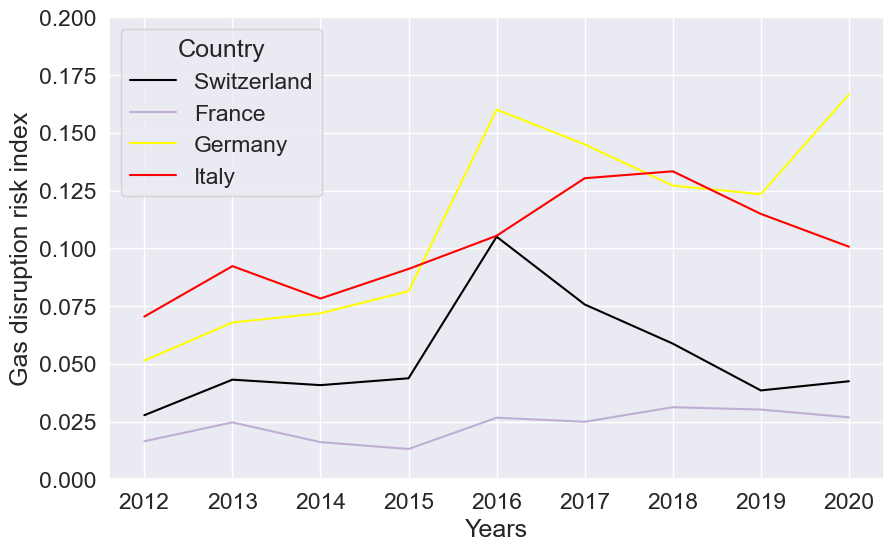

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
risk_filtered = risks_per_country[["Switzerland", "France", "Germany","Italy"]].copy()
risk_filtered.columns.rename("Country", inplace=True)
risk_filtered.plot(ax=ax, color=["#000000", "#beaed4", "yellow","red"])
y_max = 0.2
plt.ylim([0, y_max])
plt.ylabel("Gas disruption risk index")
plt.xlabel("Years")
# plt.savefig(os.path.join("../figure","interactions_risk_index_ch_fr.png"),dpi=150)


We compute the same index by changing the index

In [11]:
possible = [
    "democracy",
    "PoliticalStability",
    "ControlofCorruption",
    "GovernmentEffectiveness",
    "RegulatoryQuality",
    "RuleofLaw",
    "VoiceandAccountability",
]

# Use PoliticalStability
index = helpers.load_index(possible[1])
risks_per_country = []

for Year in range(2012, 2021):
    # Compute the quantities required for the solution of the linear system
    domestic_prod = helpers.domestic_prod(import_df, Year)
    A = helpers.compute_A(import_df, Year)
    B = helpers.compute_B(import_df, Year)
    # Compute the risk
    risk = helpers.compute_risk(
        A, B, domestic_prod, index[str(Year)], risk_domestic_prod=0, factor_euro=0.1
    )
    risks_per_country.append(risk)
risks_per_country = pd.DataFrame(
    risks_per_country, columns=A.index, index=range(2012, 2021)
).rename({"Country_import": "Year"})
risks_per_country


Country_import,Switzerland,Belgium,Bulgaria,Czech Republic,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Slovakia,Finland,Sweden,Norway,United Kingdom,North Macedonia,Serbia,Turkey,Moldova,Ukraine
2012,0.036025,0.004804,0.470406,0.416871,0.000139,0.065232,0.793239,0.032504,0.267182,0.166276,...,0.332755,0.793239,0.018151,9.629027e-13,0.003411,0.780873,0.168253,0.282980,0.768382,0.190038
2013,0.051308,0.005015,0.535072,0.489083,0.001630,0.081415,0.769163,0.029149,0.349884,0.242407,...,0.383255,0.769163,0.018502,0.000000e+00,0.002264,0.758561,0.190447,0.273800,0.743558,0.135270
2014,0.053020,0.006366,0.577602,0.379221,0.000111,0.090349,0.827317,0.032894,0.293001,0.276360,...,0.406323,0.827317,0.017171,0.000000e+00,0.004059,0.812773,0.291226,0.271147,0.803251,0.066978
2015,0.060840,0.008044,0.636347,0.485677,0.000105,0.103851,0.848339,0.030834,0.324540,0.272293,...,0.363090,0.848339,0.018573,0.000000e+00,0.004836,0.835779,0.380149,0.275533,0.818879,0.018444
2016,0.134692,0.008409,0.625956,0.510832,0.000233,0.196178,0.827979,0.006979,0.356676,0.266767,...,0.364569,0.827979,0.019505,0.000000e+00,0.003741,0.819950,0.362326,0.250486,0.802234,0.002062
2017,0.089507,0.009212,0.576101,0.477294,0.000082,0.157478,0.716801,0.004674,0.293419,0.195831,...,0.387062,0.739119,0.010452,0.000000e+00,0.003201,0.733541,0.387660,0.224010,0.715054,0.003520
2018,0.068503,0.013412,0.554938,0.408595,0.000065,0.128313,0.702502,0.008464,0.313121,0.202826,...,0.296672,0.667042,0.009166,8.198723e-11,0.002776,0.698892,0.377282,0.179940,0.686573,0.001616
2019,0.049434,0.020126,0.353686,0.450440,0.004057,0.128765,0.697695,0.010850,0.092000,0.106163,...,0.423211,0.658442,0.010883,1.068191e-09,0.005620,0.704648,0.394145,0.136957,0.686603,0.002038
2020,0.055691,0.013993,0.331426,0.362376,0.038174,0.191458,0.363327,0.015365,0.148796,0.088239,...,0.214432,0.374922,0.035874,7.839834e-09,0.003362,0.761866,0.176857,0.137267,0.743571,0.002155


Obtain similar figure as before

Text(0.5, 0, 'Years')

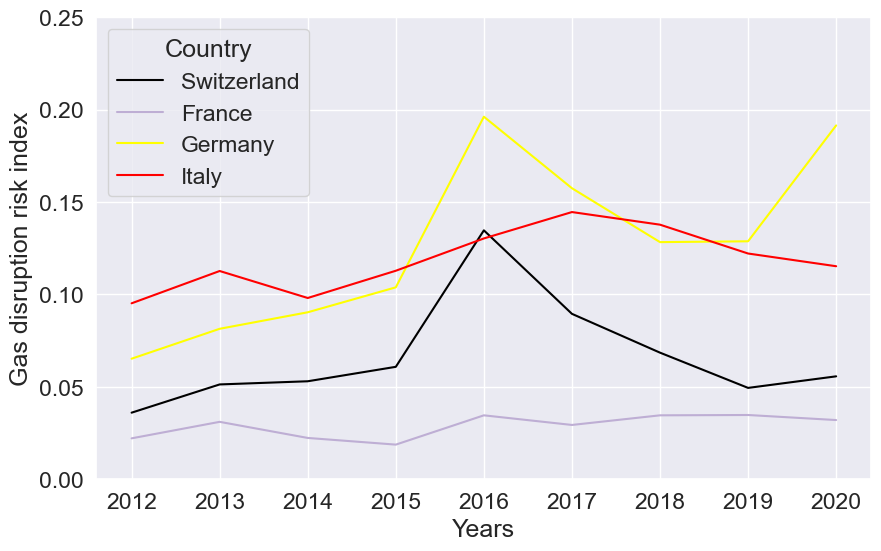

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
risk_filtered = risks_per_country[["Switzerland", "France", "Germany","Italy"]].copy()
risk_filtered.columns.rename("Country", inplace=True)
risk_filtered.plot(ax=ax, color=["#000000", "#beaed4", "yellow","red"])
y_max = 0.25
plt.ylim([0, y_max])
plt.ylabel("Gas disruption risk index")
plt.xlabel("Years")


Text(0, 0.5, 'Political stability of France')

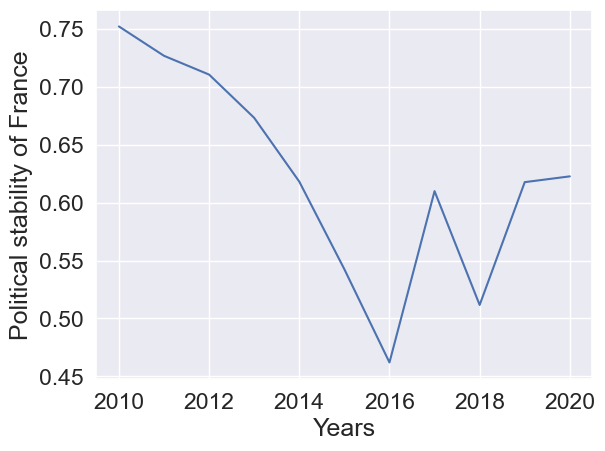

In [13]:
index.loc["France"].plot()
plt.xlabel("Years")
plt.ylabel("Political stability of France")


# Increase risk in non-euro countries

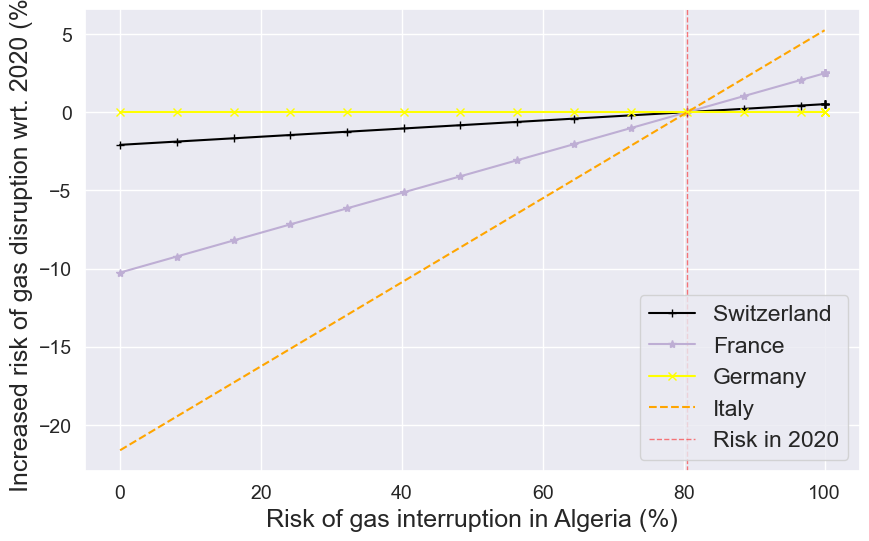

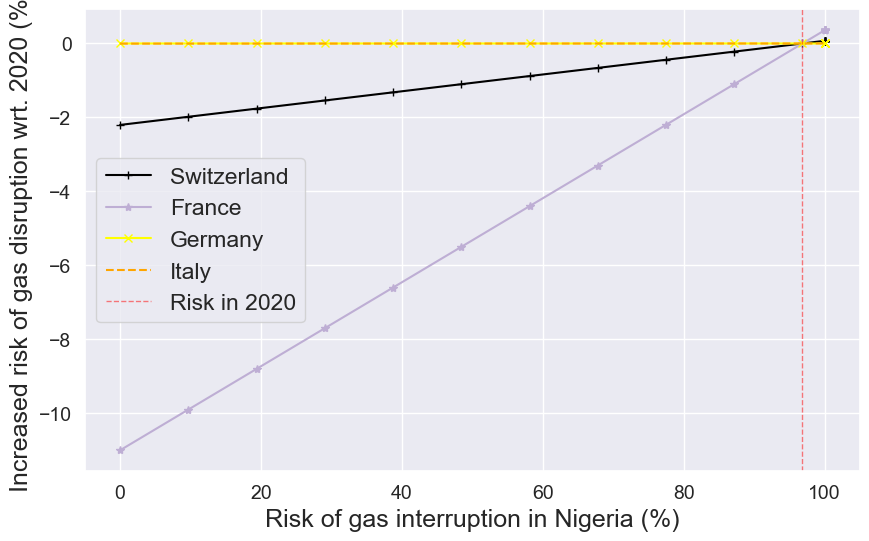

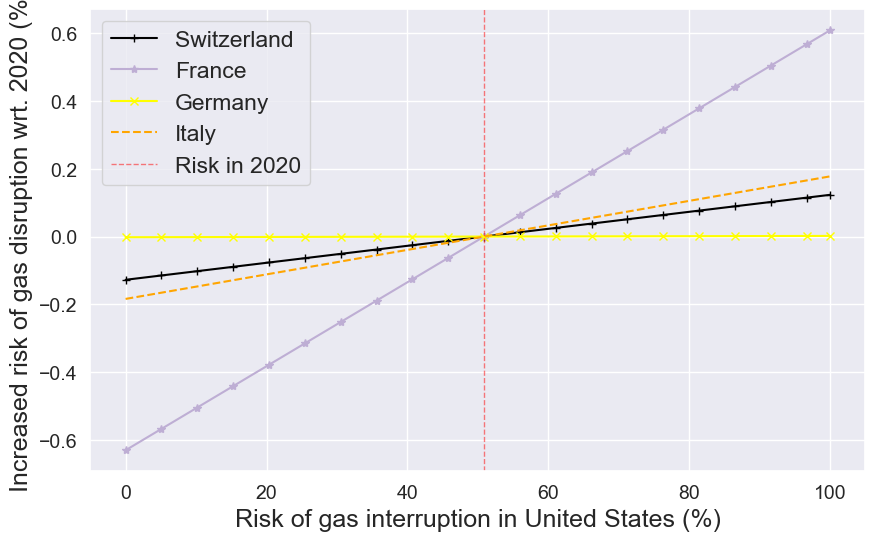

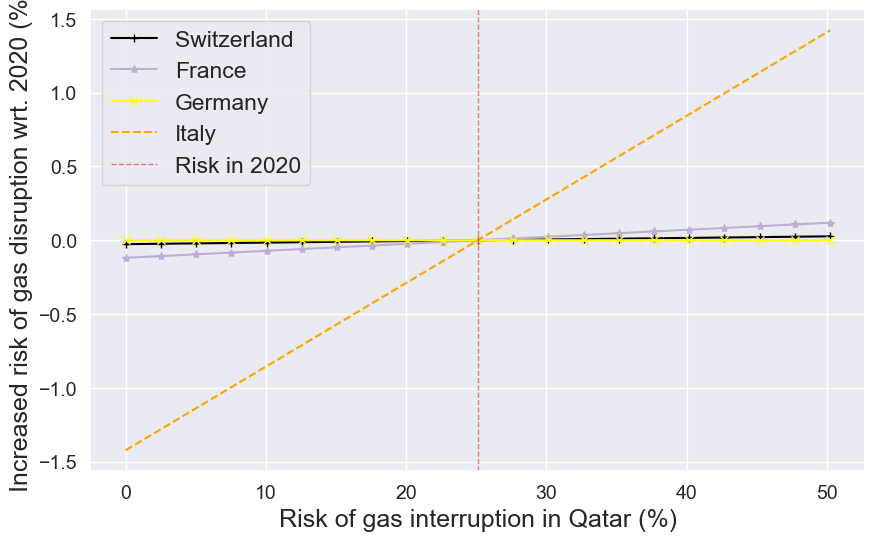

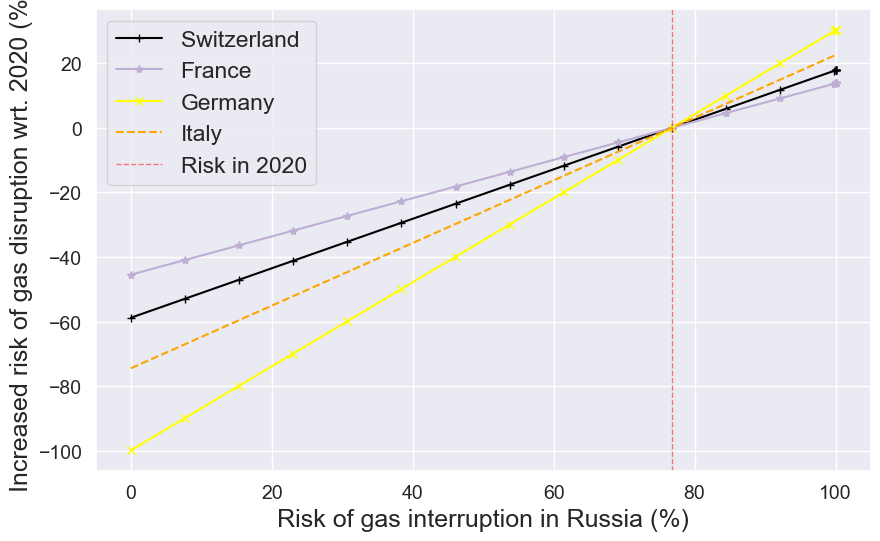

In [14]:
countries_large_imports = [
    "Algeria",
    "Nigeria",
    "United States",
    "Qatar",
    "Russia",
]
Year = 2020

for i in range(5):
    percent_increase_ = []
    risk_in_country = []
    for j in np.linspace(-1, 1, 21):
        domestic_prod = helpers.domestic_prod(import_df, Year)
        A = helpers.compute_A(import_df, Year)
        B = helpers.compute_B(import_df, Year)
        index_ = index[str(Year)].copy()

        # Increase of the risk by j
        def adjust(x):
            if countries_large_imports[i] in x.index:
                x.loc[countries_large_imports[i]] = min(
                    max(x.loc[countries_large_imports[i]] * (1 + j), 0), 1
                )
                risk_in_country.append(x.loc[countries_large_imports[i]])
            return x

        risk = helpers.compute_risk(
            A,
            B,
            domestic_prod,
            index_,
            risk_domestic_prod=0.0,
            factor_euro=0.1,
            adjust=adjust,
        )
        risks_per_country.loc[2021] = risk

        percent_increase = (
            (risks_per_country.loc[2021] - risks_per_country.loc[2020])
            / risks_per_country.loc[2020]
            * 100
        )

        percent_increase_.append(percent_increase)
    risks = pd.concat(percent_increase_, axis=1).T
    risks.index = np.array(risk_in_country) * 100  # np.linspace(-1,1,21)*100
    countries = ["Switzerland", "France", "Germany", "Italy"]
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    risks[countries].plot(
        ax=ax,
        color=["#000000", "#beaed4", "yellow", "orange"],
        style=["-+", "-*", "-x", "--"],
        fontsize=14,
    )
    plt.axvline(
        risk_in_country[len(risk_in_country) // 2] * 100,
        linestyle="--",
        color="red",
        alpha=0.5,
        linewidth=1,
        label="Risk in 2020",
    )
    plt.ylabel("Increased risk of gas disruption wrt. 2020 (%)")
    plt.xlabel(f"Risk of gas interruption in {countries_large_imports[i]} (%)")
    plt.legend()
    plt.show()


# Change in risk due to european internal risk changes

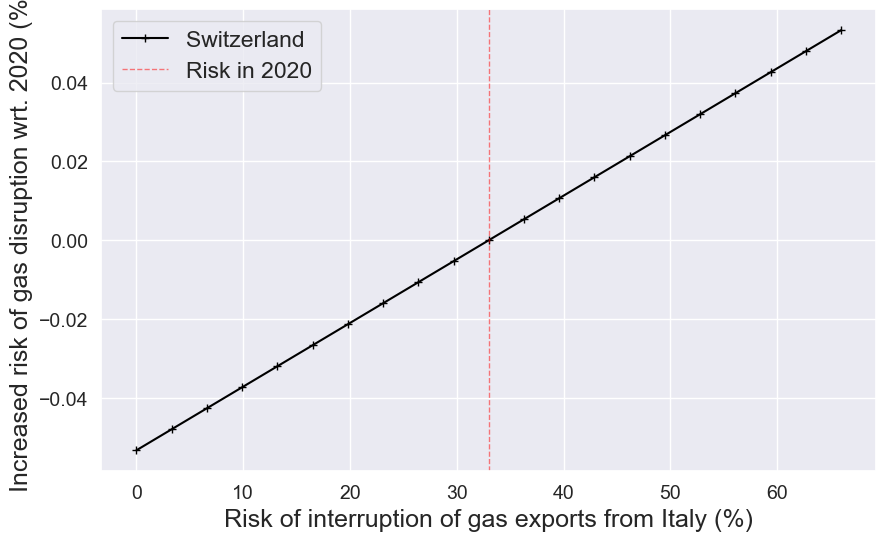

In [15]:
countries_large_imports = ["Italy"]
percent_increase_ = []
risk_in_country = []
i = 0
for j in np.linspace(-1, 1, 21):
    domestic_prod = helpers.domestic_prod(import_df, Year)
    A = helpers.compute_A(import_df, Year)
    B = helpers.compute_B(import_df, Year)
    index_ = index[str(Year)].copy()

    # Increase of the risk by j
    def adjust(x):
        if countries_large_imports[i] in x.index:
            x.loc[countries_large_imports[i]] = min(
                max(x.loc[countries_large_imports[i]] * (1 + j), 0), 1
            )
            risk_in_country.append(x.loc[countries_large_imports[i]])
        return x

    risk = helpers.compute_risk(
        A,
        B,
        domestic_prod,
        index_,
        risk_domestic_prod=0.0,
        factor_euro=0.1,
        adjust=adjust,
    )
    risks_per_country.loc[2021] = risk

    percent_increase = (
        (risks_per_country.loc[2021] - risks_per_country.loc[2020])
        / risks_per_country.loc[2020]
        * 100
    )

    percent_increase_.append(percent_increase)
risks = pd.concat(percent_increase_, axis=1).T
risks.index = np.array(risk_in_country) * 100  # np.linspace(-1,1,21)*100
countries = ["Switzerland"]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
risks[countries].plot(
    ax=ax,
    color=["#000000"],
    style=["-+", "-*", "-x", "--"],
    fontsize=14,
)
plt.axvline(
    risk_in_country[len(risk_in_country) // 2] * 100,
    linestyle="--",
    color="red",
    alpha=0.5,
    linewidth=1,
    label="Risk in 2020",
)
plt.ylabel("Increased risk of gas disruption wrt. 2020 (%)")
plt.xlabel(f"Risk of interruption of gas exports from {countries_large_imports[i]} (%)")
plt.legend()
plt.show()


# Change of import structure

Change of the risk wrt. domestic production. That is we compute the derivative of the risk wrt. to the domestic production,i.e.
$$\frac{\partial risk_{CH}}{\partial prop_{production+storage}}$$

To be interpreted as how the risk for CH will change if a country increase its national storage capacity or production.

In [16]:
Year = 2020
domestic_prod = helpers.domestic_prod(import_df, Year)
A = helpers.compute_A(import_df, Year)
B = helpers.compute_B(import_df, Year)
index_ = index[str(Year)].copy()


derivative = helpers.domestic_derivative(
    A, B, domestic_prod, index_, risk_domestic_prod=0.0, factor_euro=0.1, power=1
)
derivative = (
    pd.DataFrame(derivative, index=A.columns, columns=["Swiss imports"])
    * 100
)
# Keep only countries that have an impact by more than 0.01%
# Relative to the current risk
relative=True
if relative:
    risk = helpers.compute_risk(
        A,
        B,
        domestic_prod,
        index_,
        risk_domestic_prod=0.0,
        factor_euro=0.1,
        adjust=adjust,
    )
    ratio=derivative/risk[0]
    # Percent
    print(ratio[np.abs(ratio["Swiss imports"])>0.01]) # Switzerland
else:
    print(derivative[np.abs(derivative["Swiss imports"]) > 0.01])


                Swiss imports
Switzerland       -703.917236
Belgium             -1.045043
Denmark             -0.286763
Germany            -14.808456
Spain               -0.171830
France             -26.375011
Italy               -0.335324
Netherlands         -3.891511
Norway              -0.029583
United Kingdom      -0.240432


Change of the risk wrt. imports. That is we compute the derivative of the risk for CH wrt. to $prop_{CH,j}$ (proportion of imports from country j to CH).

Value must be interpreted as how the risk for CH will change if CH increases the imports from this country.

The first column for Switzerland means how the risk will change if an increase of the storage capacitiy/production is developped in CH.

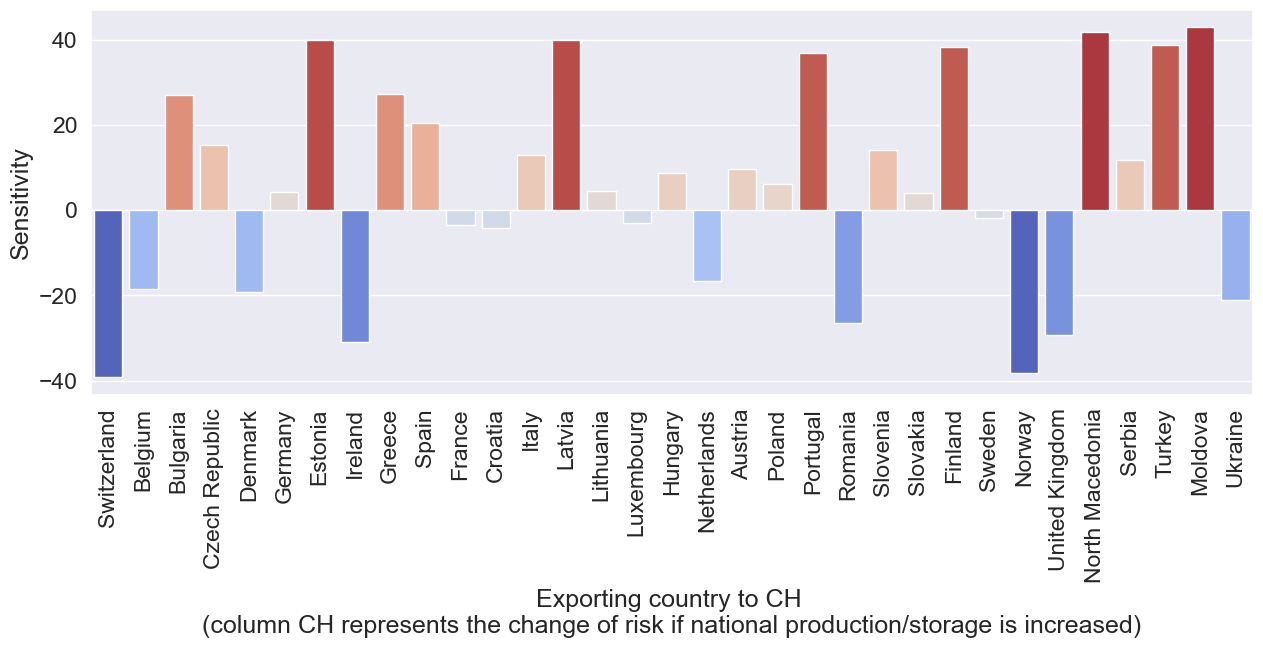

In [17]:
domestic_prod = helpers.domestic_prod(import_df, Year)
A = helpers.compute_A(import_df, Year)
B = helpers.compute_B(import_df, Year)
index_ = index[str(Year)].copy()

derivative_prop = helpers.imports_derivative(
    A, B, domestic_prod, index_, risk_domestic_prod=0.0, factor_euro=0.1, power=1
)


def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


i = 0
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# d risk_CH / d A[i,:]
data = (
    pd.DataFrame(derivative_prop[i, i], index=A.columns, columns=["Swiss imports"])
    * 100
)

data = data.reset_index()
# https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
g = sns.barplot(
    data=data,
    x="index",
    y="Swiss imports",
    palette=colors_from_values(data["Swiss imports"], "coolwarm"),
)  # ,cmap="coolwarm",center=0,ax=ax, linewidths=.5)
plt.ylabel("Sensitivity")
plt.xlabel("Exporting country to CH \n(column CH represents the change of risk if national production/storage is increased)")
for item in g.get_xticklabels():
    item.set_rotation(90)
